<a href="https://colab.research.google.com/github/pouya-mhb/DS-ML-DL-Practices/blob/main/VA_Russell_Henver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# Load dataset
file_path = "static_annotations_averaged_songs_1_2000.csv"
df = pd.read_csv(file_path)

In [15]:
df.head()

,song_id,valence_mean,valence_std,arousal_mean,arousal_std
0,2,3.1,0.94,3.0,0.63
1,3,3.5,1.75,3.3,1.62
2,4,5.7,1.42,5.5,1.63
3,5,4.4,2.01,5.3,1.85
4,7,5.8,1.47,6.4,1.69


In [20]:
df.describe()

,song_id,valence_mean,valence_std,arousal_mean,arousal_std
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,1062.077982,4.903492,1.521950,4.812603,1.466778
std,584.299005,1.173920,0.385496,1.289368,0.367197
min,2.000000,1.600000,0.300000,1.600000,0.460000
25%,536.750000,4.100000,1.270000,3.800000,1.200000
50%,1128.500000,4.900000,1.510000,4.900000,1.480000
75%,1564.250000,5.800000,1.780000,5.800000,1.720000
max,2000.000000,8.400000,2.900000,8.100000,2.590000


In [21]:
df.columns

Index(['song_id', ' valence_mean', ' valence_std', ' arousal_mean',
       ' arousal_std'],
      dtype='object')

In [22]:
df.columns = df.columns.str.strip()  # Removes extra spaces

In [23]:
print(df[["valence_mean", "arousal_mean"]].describe())

       valence_mean  arousal_mean
count   1744.000000   1744.000000
mean       4.903492      4.812603
std        1.173920      1.289368
min        1.600000      1.600000
25%        4.100000      3.800000
50%        4.900000      4.900000
75%        5.800000      5.800000
max        8.400000      8.100000


# Hevner

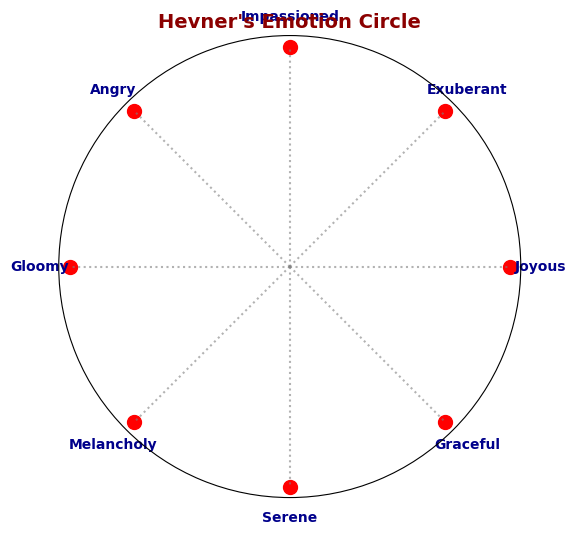

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define Hevner's eight emotion categories and their positions in a circular model
categories = [
    "Joyous", "Exuberant", "Impassioned", "Angry",
    "Gloomy", "Melancholy", "Serene", "Graceful"
]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

# Create the circular plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=10, fontweight='bold', color="darkblue")

# Adjust the plot aesthetics
ax.set_yticklabels([])  # Hide radial labels
ax.set_title("Hevner's Emotion Circle", fontsize=14, fontweight='bold', color="darkred")
ax.grid(False)  # Remove grid

# Add markers at each category position
for angle in angles:
    ax.plot([angle, angle], [0, 1], color='gray', linestyle='dotted', alpha=0.6)
    ax.scatter(angle, 1, color='red', s=100)

# Show the plot
plt.show()


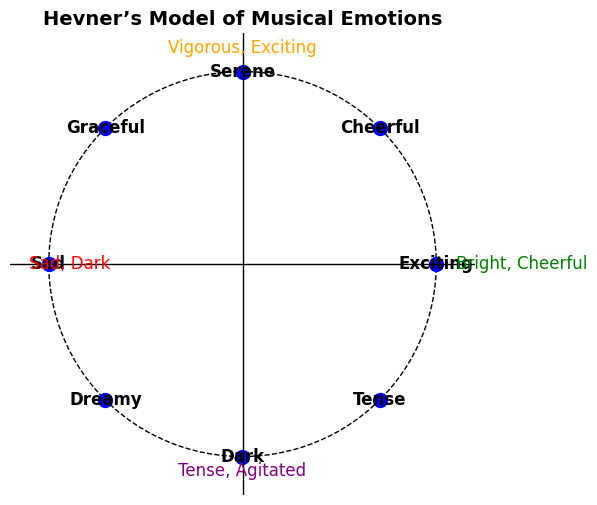

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define emotions and their circular positions (angle-based distribution)
hevner_emotions = {
    "Exciting": (np.cos(0), np.sin(0)),
    "Cheerful": (np.cos(np.pi / 4), np.sin(np.pi / 4)),
    "Serene": (np.cos(np.pi / 2), np.sin(np.pi / 2)),
    "Graceful": (np.cos(3 * np.pi / 4), np.sin(3 * np.pi / 4)),
    "Sad": (np.cos(np.pi), np.sin(np.pi)),
    "Dreamy": (np.cos(5 * np.pi / 4), np.sin(5 * np.pi / 4)),
    "Dark": (np.cos(3 * np.pi / 2), np.sin(3 * np.pi / 2)),
    "Tense": (np.cos(7 * np.pi / 4), np.sin(7 * np.pi / 4)),
}

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

# Draw the circular boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle="--")
ax.add_patch(circle)

# Plot emotion points
for emotion, (x, y) in hevner_emotions.items():
    ax.scatter(x, y, color='blue', s=100)
    ax.text(x, y, emotion, fontsize=12, ha='center', va='center', fontweight='bold')

# Draw X and Y axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Labels
ax.text(1.1, 0, "Bright, Cheerful", fontsize=12, verticalalignment='center', color='green')
ax.text(-1.1, 0, "Sad, Dark", fontsize=12, verticalalignment='center', color='red')
ax.text(0, 1.1, "Vigorous, Exciting", fontsize=12, horizontalalignment='center', color='orange')
ax.text(0, -1.1, "Tense, Agitated", fontsize=12, horizontalalignment='center', color='purple')

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show plot
plt.title("Hevner’s Model of Musical Emotions", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "static_annotations_averaged_songs_1_2000.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Define thresholds for valence and arousal
valence_threshold = df["valence_mean"].median()
arousal_threshold = df["arousal_mean"].median()

# Function to map VA values to Hevner's 8 emotion categories
def map_to_emotion(valence, arousal):
    if valence >= valence_threshold and arousal >= arousal_threshold:
        return "Joyous"      # High Valence, High Arousal
    elif valence >= valence_threshold and arousal >= (arousal_threshold * 0.75):
        return "Exuberant"   # High Valence, Moderately High Arousal
    elif valence >= valence_threshold and arousal < (arousal_threshold * 0.75):
        return "Graceful"    # High Valence, Low Arousal
    elif valence >= (valence_threshold * 0.75) and arousal < arousal_threshold:
        return "Serene"      # Moderately High Valence, Low Arousal
    elif valence < (valence_threshold * 0.75) and arousal < arousal_threshold:
        return "Melancholy"  # Low Valence, Low Arousal
    elif valence < valence_threshold and arousal < (arousal_threshold * 0.75):
        return "Gloomy"      # Very Low Valence, Very Low Arousal
    elif valence < valence_threshold and arousal >= arousal_threshold:
        return "Impassioned" # Low Valence, High Arousal
    else:
        return "Angry"       # Very Low Valence, Very High Arousal

# Apply mapping function
df["emotion"] = df.apply(lambda row: map_to_emotion(row["valence_mean"], row["arousal_mean"]), axis=1)

# Save the new dataset
output_file = "VA_Henver_8Categories.csv"
df.to_csv(output_file, index=False)

print(f"Dataset mapped to 8 Hevner categories and saved as {output_file}")


Dataset mapped to 8 Hevner categories and saved as VA_Henver_8Categories.csv


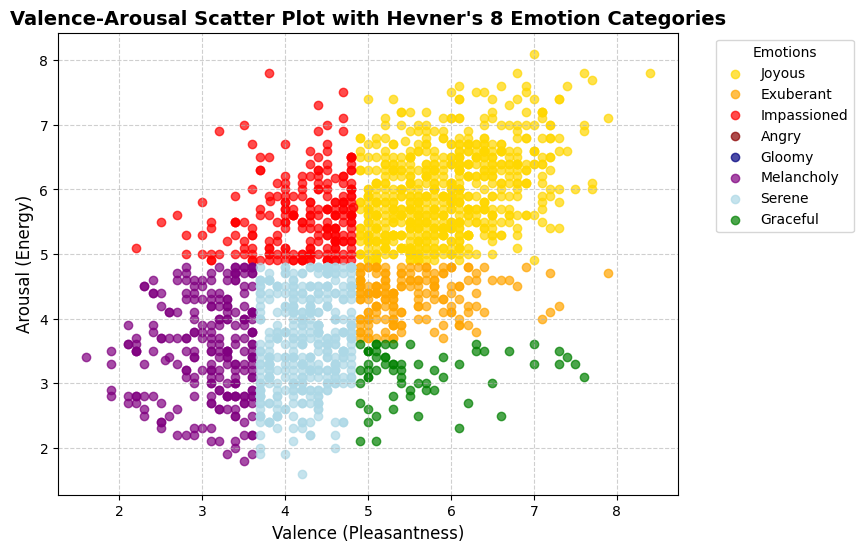

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with 8 Hevner categories
file_path = "VA_Henver_8Categories.csv"  # Change this if needed
df = pd.read_csv(file_path)

# Define colors for all 8 Hevner emotion categories
emotion_colors = {
    "Joyous": "gold",
    "Exuberant": "orange",
    "Impassioned": "red",
    "Angry": "darkred",
    "Gloomy": "navy",
    "Melancholy": "purple",
    "Serene": "lightblue",
    "Graceful": "green"
}

# Create scatter plot
plt.figure(figsize=(8, 6))
for emotion, color in emotion_colors.items():
    subset = df[df["emotion"] == emotion]
    plt.scatter(subset["valence_mean"], subset["arousal_mean"], label=emotion, color=color, alpha=0.7)

# Labels and aesthetics
plt.xlabel("Valence (Pleasantness)", fontsize=12)
plt.ylabel("Arousal (Energy)", fontsize=12)
plt.title("Valence-Arousal Scatter Plot with Hevner's 8 Emotion Categories", fontsize=14, fontweight='bold')
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


# Russell

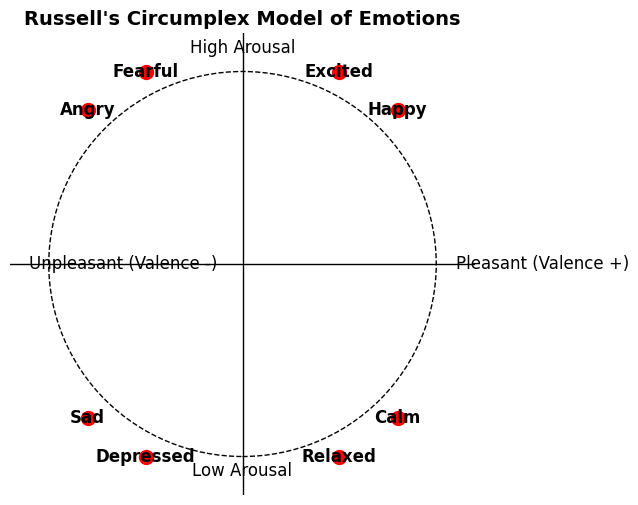

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define emotions and their positions in the circumplex model
emotions = {
    "Happy": (0.8, 0.8),
    "Excited": (0.5, 1.0),
    "Angry": (-0.8, 0.8),
    "Fearful": (-0.5, 1.0),
    "Sad": (-0.8, -0.8),
    "Depressed": (-0.5, -1.0),
    "Calm": (0.8, -0.8),
    "Relaxed": (0.5, -1.0)
}

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

# Draw the circular boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle="--")
ax.add_patch(circle)

# Plot emotion points
for emotion, (x, y) in emotions.items():
    ax.scatter(x, y, color='red', s=100)
    ax.text(x, y, emotion, fontsize=12, ha='center', va='center', fontweight='bold')

# Draw X and Y axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Labels
ax.text(1.1, 0, "Pleasant (Valence +)", fontsize=12, verticalalignment='center')
ax.text(-1.1, 0, "Unpleasant (Valence -)", fontsize=12, verticalalignment='center')
ax.text(0, 1.1, "High Arousal", fontsize=12, horizontalalignment='center')
ax.text(0, -1.1, "Low Arousal", fontsize=12, horizontalalignment='center')

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show plot
plt.title("Russell's Circumplex Model of Emotions", fontsize=14, fontweight='bold')
plt.show()


# Russell 4 emotions

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "static_annotations_averaged_songs_1_2000.csv"
df = pd.read_csv(file_path)

# Clean column names (in case of extra spaces)
df.columns = df.columns.str.strip()

# Define dynamic thresholds based on the dataset's median values
valence_threshold = df["valence_mean"].median()
arousal_threshold = df["arousal_mean"].median()

# Function to map emotions using Russell's model
def map_russell_emotion(v, a, v_thresh, a_thresh):
    if v >= v_thresh and a >= a_thresh:
        return "Happy"
    elif v >= v_thresh and a < a_thresh:
        return "Calm"
    elif v < v_thresh and a >= a_thresh:
        return "Angry"
    else:
        return "Sad"

# Apply mapping function
df["russell_emotion"] = df.apply(lambda row: map_russell_emotion(row["valence_mean"], row["arousal_mean"], valence_threshold, arousal_threshold), axis=1)

# Save new dataset with Russell's emotion categories
output_path = "VA_Russell.csv"
df.to_csv(output_path, index=False)

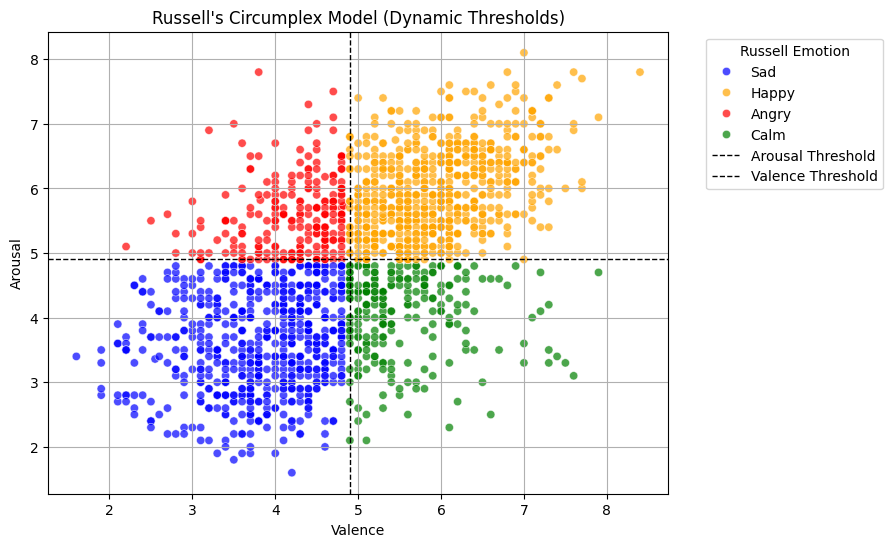

New file saved as VA_Russell.csv


In [26]:

# Define colors for plot
russell_colors = {
    "Happy": "orange",
    "Calm": "green",
    "Angry": "red",
    "Sad": "blue"
}

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["valence_mean"],
    y=df["arousal_mean"],
    hue=df["russell_emotion"],
    palette=russell_colors,
    alpha=0.7
)

# Add threshold reference lines
plt.axhline(arousal_threshold, color="black", linestyle="--", linewidth=1, label="Arousal Threshold")
plt.axvline(valence_threshold, color="black", linestyle="--", linewidth=1, label="Valence Threshold")

# Labels and title
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.title("Russell's Circumplex Model (Dynamic Thresholds)")
plt.legend(title="Russell Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show plot
plt.show()

print(f"New file saved as {output_path}")


# Random Forest on Russell

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "VA_Russell.csv"  # Use the dataset with emotion labels
df = pd.read_csv(file_path)

# Select features (X) and target labels (y)
X = df[["valence_mean", "arousal_mean"]]
y = df["russell_emotion"]  # Change to "hevner_emotion" if needed

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Predict emotion for a new valence/arousal value
new_data = np.array([[6.0, 7.5]])  # Example: Valence=6.0, Arousal=7.5
predicted_emotion = model.predict(new_data)
print(f"Predicted Emotion: {predicted_emotion[0]}")


Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       Angry       1.00      1.00      1.00        51
        Calm       1.00      1.00      1.00        47
       Happy       1.00      1.00      1.00       114
         Sad       1.00      1.00      1.00       137

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349

Predicted Emotion: Happy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
